In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
# Read the data
df = pd.read_excel("sales_data_hackathon.xlsx", sheet_name="Sheet1")
df_nr = pd.read_csv("Curves_month_6_predicton.csv")[["Year", "Month", "SKU", "Brand", "Pack", "Net_Revenue_LC"]]
df_nr2 = pd.read_csv("Curves_month_7_predicton_300.csv")[["Year", "Month", "SKU", "Brand", "Pack", "Net_Revenue_LC"]]

In [94]:
# Change the type of data
df_nr["Year"] = df_nr["Year"].astype(str)
df_nr2["Year"] = df_nr2["Year"].astype(str)

In [95]:
# Change the type of data
df_nr["Net_Revenue_LC"] = df_nr["Net_Revenue_LC"].astype(float)
df_nr2["Net_Revenue_LC"] = df_nr2["Net_Revenue_LC"].astype(float)

In [96]:
# Average the net revenu elinspace
df_nr = df_nr.groupby(["Year", "Month", "SKU"])["Net_Revenue_LC"].mean().reset_index()
df_nr2 = df_nr2.groupby(["Year", "Month", "SKU"])["Net_Revenue_LC"].mean().reset_index()

In [97]:
# Select the same variables for historical sales 
df = df[["Year", "Month", "SKU", "Net_Revenue_LC"]].dropna()

In [98]:
df.shape

(10625, 4)

In [99]:
df_nr.shape

(76, 4)

In [100]:
df_nr2.shape

(76, 4)

In [102]:
# unique skus
skus = df_nr["SKU"].unique()
skus2 = df_nr2["SKU"].unique()

# Select the only unique SKUs in the historical data
df = df[df["SKU"].isin(skus)]

In [104]:
# Same skus for june and july
skus == skus2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [106]:
# Compare if the same unique skus
df["SKU"].nunique(), df_nr["SKU"].nunique(), df_nr2["SKU"].nunique()

(76, 76, 76)

In [107]:
# Esta linea considera los meses predichos
df = pd.concat([df, df_nr, df_nr2], axis=0)

In [108]:
# Change date format
df['date'] = pd.to_datetime(df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2), format='%Y%m')

In [109]:
# Eliminate year and month
df=df.drop(["Year", "Month"], axis=1)

In [110]:
# Sort the DataFrame by date
df.sort_values(by='date', inplace=True)
df.head()

,SKU,Net_Revenue_LC,date
46,yvlFSF,1.034923e+08,2019-01-01
3727,YzaCmF,2.859776e+08,2019-01-01
7853,lOLcFD,7.539839e+07,2019-01-01
4675,mFEENn,1.233113e+08,2019-01-01
2248,fWkemq,1.122386e+10,2019-01-01


In [57]:
# Sort the DataFrame by date
'''df.sort_values(by='date', inplace=True)

# Group the DataFrame by 'id' and filter to keep only the last 6 months of data for each group
filtered_groups = []
for _, group in df.groupby('SKU'):
    last_6_months = group[group['date'] >= group['date'].max() - pd.DateOffset(months=23)]
    if len(last_6_months) == 24:
        filtered_groups.append(last_6_months)

# Concatenate the filtered groups back into a DataFrame
if filtered_groups:
    selected_data = pd.concat(filtered_groups)

# Reset the index of the resulting DataFrame if needed
selected_data.reset_index(drop=True, inplace=True)'''

"df.sort_values(by='date', inplace=True)\n\n# Group the DataFrame by 'id' and filter to keep only the last 6 months of data for each group\nfiltered_groups = []\nfor _, group in df.groupby('SKU'):\n    last_6_months = group[group['date'] >= group['date'].max() - pd.DateOffset(months=23)]\n    if len(last_6_months) == 24:\n        filtered_groups.append(last_6_months)\n\n# Concatenate the filtered groups back into a DataFrame\nif filtered_groups:\n    selected_data = pd.concat(filtered_groups)\n\n# Reset the index of the resulting DataFrame if needed\nselected_data.reset_index(drop=True, inplace=True)"

In [111]:
# Data structure for markowitz optimization
df_markowitz = pd.pivot_table(df, index="date", columns="SKU", values="Net_Revenue_LC").fillna(0)
df_markowitz.head(n=3)

SKU,AjMMHY,CPXipv,CpWPBT,DFBEVC,DGeaFa,DYnHEw,DuLkEe,DunSRa,DvLfgO,EWpIvF,...,uJXecI,uWOybK,wGeFqS,wTKjmX,wgadDW,yEDccP,yOnftl,ykzJnG,yvlFSF,ztGEho
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,7003948.81,2.792583e+08,8.806788e+08,1.486227e+10,-7.189805e+05,-11457.31,-896377.84,0.0,3.301221e+08,7.323683e+08,...,1.125088e+10,1878925.02,5.292427e+08,-180604.56,0.000000e+00,5.198005e+08,0.00,7.637676e+09,1.034923e+08,4.992793e+08
2019-02-01,15672105.04,3.314126e+08,7.055668e+08,1.238450e+10,2.267001e+06,-9901.47,-379394.06,0.0,4.039810e+08,1.821016e+09,...,8.883049e+09,4573669.61,6.425032e+08,-232422.90,3.582961e+09,5.963920e+08,0.00,6.532748e+09,8.867802e+07,4.837614e+08
2019-03-01,21016788.18,2.638221e+08,9.100501e+08,1.452795e+10,4.602415e+08,-16568.61,1363867.14,0.0,4.355307e+08,1.730450e+09,...,1.002815e+10,4836962.77,6.084192e+08,-327077.81,8.402698e+09,5.126777e+08,-2894.97,7.845508e+09,1.351546e+08,5.078867e+08


In [112]:
# Transform the negative net revenue to zero
df_markowitz = df_markowitz.applymap(lambda row: max(row, 0))
df_markowitz.head(n=3)

SKU,AjMMHY,CPXipv,CpWPBT,DFBEVC,DGeaFa,DYnHEw,DuLkEe,DunSRa,DvLfgO,EWpIvF,...,uJXecI,uWOybK,wGeFqS,wTKjmX,wgadDW,yEDccP,yOnftl,ykzJnG,yvlFSF,ztGEho
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,7003948.81,2.792583e+08,8.806788e+08,1.486227e+10,0.000000e+00,0.0,0.00,0.0,3.301221e+08,7.323683e+08,...,1.125088e+10,1878925.02,5.292427e+08,0.0,0.000000e+00,5.198005e+08,0.0,7.637676e+09,1.034923e+08,4.992793e+08
2019-02-01,15672105.04,3.314126e+08,7.055668e+08,1.238450e+10,2.267001e+06,0.0,0.00,0.0,4.039810e+08,1.821016e+09,...,8.883049e+09,4573669.61,6.425032e+08,0.0,3.582961e+09,5.963920e+08,0.0,6.532748e+09,8.867802e+07,4.837614e+08
2019-03-01,21016788.18,2.638221e+08,9.100501e+08,1.452795e+10,4.602415e+08,0.0,1363867.14,0.0,4.355307e+08,1.730450e+09,...,1.002815e+10,4836962.77,6.084192e+08,0.0,8.402698e+09,5.126777e+08,0.0,7.845508e+09,1.351546e+08,5.078867e+08


In [113]:
df_markowitz.shape

(55, 76)

In [61]:
# Delete all the columns below zero
# df_markowitz = df_markowitz.loc[:, (df_markowitz != 0).any()]

In [114]:
# Calcualte the monthly returns
df_returns = df_markowitz.pct_change()

In [118]:
df_returns.shape

(55, 76)

In [123]:
# Select the 48 historical months
df_returns = df_returns.iloc[-48:, :].dropna(axis=1)

In [124]:
# Filter the inf values
df_returns = df_returns[~df_returns.isin([np.inf, -np.inf]).any(axis=1)]

In [125]:
# Calcualte the expected and volatility return
summary = pd.DataFrame({
    "media": df_returns.mean(),
    "vol": df_returns.std()
})
summary.head()

,media,vol
SKU,,
CPXipv,0.652100,2.171002
DFBEVC,0.006854,0.205825
DYnHEw,1.341382,6.286047
DunSRa,0.070323,0.207973
DvLfgO,0.172847,0.708357


In [126]:
summary["media"].max()

19.929097000253524

In [127]:
df_returns

SKU,CPXipv,DFBEVC,DYnHEw,DunSRa,DvLfgO,EWpIvF,EdlSBU,JahmoZ,KYbaDS,KaRAzM,...,mFEENn,nXuqgq,nrllcF,pAZzxg,qtYARp,tOpsPF,uJXecI,wGeFqS,yEDccP,ykzJnG
date,,,,,,,,,,,,,,,,,,,,,
2019-08-01,0.207501,-0.107585,40.996453,0.761101,-0.321554,0.088474,0.079923,-0.259598,-0.028706,-0.096607,...,-0.099001,0.092818,-0.011554,0.086865,0.043386,0.061837,0.049847,0.529607,0.408310,0.061196
2019-09-01,-0.472441,0.018120,-0.629978,0.034192,-0.084383,-0.077956,0.088107,0.636853,-0.095499,0.066906,...,-0.013817,-0.040116,-0.010843,-0.008716,-0.409250,0.003810,-0.091638,-0.112768,-0.601321,0.030946
2019-10-01,1.041149,-0.042164,0.944104,0.188509,0.209933,0.120904,0.170951,0.006349,-0.032539,-0.210425,...,-0.205038,-0.018085,0.710225,-0.076916,-0.246042,0.054635,0.058216,0.716997,-0.879983,-0.256270
2019-11-01,0.242438,0.103524,3.106097,0.243047,0.367383,-0.230246,-0.089330,0.369375,0.092495,0.370951,...,1.048822,0.195564,0.532599,0.685091,0.300121,0.239894,-0.065712,0.069900,-0.786710,0.360414
2019-12-01,-0.006281,0.162754,1.481343,0.359448,0.555798,-0.237489,-0.342470,0.657980,0.382459,-0.256251,...,-0.077273,0.086241,-0.051562,0.405609,0.745220,-0.097739,0.193638,-0.449560,0.305814,-0.332334
2020-01-01,-0.677764,-0.209202,-0.860718,-0.298794,-0.693623,-0.118228,-0.282712,-0.632792,-0.380129,0.027396,...,-0.706088,-0.255455,-0.288190,-0.594279,-0.466091,-0.277280,-0.170907,0.968322,-0.549521,-0.399460
2020-02-01,1.547221,-0.207947,1.768360,-0.148274,-0.030029,0.964696,0.860950,0.083800,-0.258524,-0.028632,...,0.234650,-0.374129,-0.278005,0.409653,-0.351621,-0.005092,-0.194153,-0.211234,-0.466139,0.530069
2020-03-01,0.368560,-0.320352,-0.348924,-0.139761,-0.192249,-0.370079,-0.263017,-0.338020,-0.350712,0.159112,...,-0.418866,-0.109792,-0.213405,0.002465,-0.490030,-0.345992,-0.396013,-0.119125,3.222712,-0.431990
2020-04-01,-0.823917,-0.252475,-1.000000,0.015413,-0.881837,-0.710889,-0.135037,-0.240060,-0.339439,-0.536455,...,-1.000000,-0.772942,-0.278175,-0.731436,-0.201913,-0.596230,-0.200958,-0.500787,-0.729053,-0.760827


In [129]:
# Covariance matrix
cov = df_returns.cov()
cov

SKU,CPXipv,DFBEVC,DYnHEw,DunSRa,DvLfgO,EWpIvF,EdlSBU,JahmoZ,KYbaDS,KaRAzM,...,mFEENn,nXuqgq,nrllcF,pAZzxg,qtYARp,tOpsPF,uJXecI,wGeFqS,yEDccP,ykzJnG
SKU,,,,,,,,,,,,,,,,,,,,,
CPXipv,4.713252,0.153169,0.436675,0.094104,0.244619,-0.070474,118.071470,-0.282378,0.548651,1.547182,...,0.589328,3.575338,0.366673,0.090262,60.580610,-0.086497,0.505056,0.195440,11.463329,0.266389
DFBEVC,0.153169,0.042364,0.013140,0.026411,0.072181,-0.024774,-2.665671,0.095532,0.092924,0.034518,...,0.122979,0.179322,0.042196,0.129789,6.040632,0.039242,0.077058,0.020720,1.278511,0.053093
DYnHEw,0.436675,0.013140,39.514383,0.801128,-0.128170,0.096911,-24.184738,-0.127892,0.292774,-0.061693,...,0.328397,-0.673102,0.119416,-0.214928,25.349338,0.015367,0.349189,0.614620,3.673248,0.293593
DunSRa,0.094104,0.026411,0.801128,0.043253,0.070034,0.002763,-2.984752,0.054704,0.069418,0.018473,...,0.094249,0.084749,0.033112,0.128853,4.421838,0.036618,0.057785,0.022671,0.796848,0.038124
DvLfgO,0.244619,0.072181,-0.128170,0.070034,0.501769,0.064049,-9.379330,0.233403,0.191403,0.086595,...,0.486858,0.281415,0.056591,0.536664,11.961677,0.067423,0.144764,0.082812,2.117833,0.090729
EWpIvF,-0.070474,-0.024774,0.096911,0.002763,0.064049,1.963873,-4.226470,0.172914,0.030667,0.092386,...,0.169473,-0.404673,0.049394,-0.089592,4.286857,0.209082,0.056583,0.263311,0.579522,0.028733
EdlSBU,118.071470,-2.665671,-24.184738,-2.984752,-9.379330,-4.226470,7691.525996,-15.780758,-5.151017,63.568554,...,-10.199467,-18.384615,1.380111,-20.946533,128.090184,-10.394047,-3.270413,7.376531,8.447891,2.873381
JahmoZ,-0.282378,0.095532,-0.127892,0.054704,0.233403,0.172914,-15.780758,1.483127,0.109659,0.011993,...,0.558961,-0.544561,0.139682,0.032333,8.356517,0.058989,0.132898,0.075061,1.430123,0.177083
KYbaDS,0.548651,0.092924,0.292774,0.069418,0.191403,0.030667,-5.151017,0.109659,0.306129,0.150447,...,0.362929,0.190478,0.100695,0.390892,23.279855,0.076840,0.249838,0.067373,4.377535,0.138815


In [130]:
# Matriz de correlación
corr = df_returns.corr()
corr

SKU,CPXipv,DFBEVC,DYnHEw,DunSRa,DvLfgO,EWpIvF,EdlSBU,JahmoZ,KYbaDS,KaRAzM,...,mFEENn,nXuqgq,nrllcF,pAZzxg,qtYARp,tOpsPF,uJXecI,wGeFqS,yEDccP,ykzJnG
SKU,,,,,,,,,,,,,,,,,,,,,
CPXipv,1.000000,0.342778,0.031998,0.208421,0.159066,-0.023164,0.620124,-0.106802,0.456755,0.760470,...,0.286625,0.404354,0.498721,0.021352,0.597587,-0.049483,0.475593,0.169385,0.522981,0.246548
DFBEVC,0.342778,1.000000,0.010156,0.617002,0.495075,-0.085890,-0.147673,0.381119,0.815972,0.178955,...,0.630886,0.213915,0.605354,0.323836,0.628510,0.236792,0.765379,0.189418,0.615236,0.518302
DYnHEw,0.031998,0.010156,1.000000,0.612799,-0.028784,0.011001,-0.043869,-0.016706,0.084179,-0.010473,...,0.055162,-0.026291,0.056095,-0.017559,0.086361,0.003036,0.113564,0.183971,0.057877,0.093846
DunSRa,0.208421,0.617002,0.612799,1.000000,0.475390,0.009479,-0.163642,0.215987,0.603271,0.094784,...,0.478505,0.100054,0.470125,0.318181,0.455328,0.218675,0.568024,0.205105,0.379493,0.368327
DvLfgO,0.159066,0.495075,-0.028784,0.475390,1.000000,0.064522,-0.150978,0.270561,0.488365,0.130450,...,0.725718,0.097544,0.235903,0.389078,0.361633,0.118215,0.417797,0.219970,0.296125,0.257359
EWpIvF,-0.023164,-0.085890,0.011001,0.009479,0.064522,1.000000,-0.034389,0.101318,0.039552,0.070348,...,0.127691,-0.070901,0.104078,-0.032832,0.065510,0.185300,0.082544,0.353536,0.040959,0.041197
EdlSBU,0.620124,-0.147673,-0.043869,-0.163642,-0.150978,-0.034389,1.000000,-0.147752,-0.106153,0.773458,...,-0.122797,-0.051470,0.046467,-0.122657,0.031278,-0.147195,-0.076235,0.158258,0.009541,0.065831
JahmoZ,-0.106802,0.381119,-0.016706,0.215987,0.270561,0.101318,-0.147752,1.000000,0.162744,0.010508,...,0.484629,-0.109790,0.338682,0.013635,0.146948,0.060158,0.223093,0.115970,0.116311,0.292168
KYbaDS,0.456755,0.815972,0.084179,0.603271,0.488365,0.039552,-0.106153,0.162744,1.000000,0.290157,...,0.692607,0.084527,0.537398,0.362819,0.901064,0.172484,0.923128,0.229115,0.783633,0.504116


In [131]:
# Tasa libre de riesgo
rf = 0.1130 / 12
rf

0.009416666666666667

In [132]:
# Definimos el número de portafolios que simularemos, y la cantidad de activos que tenemos
n_activos = summary.shape[0]
n_portafolios = 100000

In [133]:
# Generar una matriz de pesos de n_portafolios x n_activos,
W = np.random.dirichlet(alpha=(1,) * n_activos, size=n_portafolios)
W

array([[8.06243861e-03, 2.51046065e-03, 4.41619133e-02, ...,
        1.70019106e-02, 1.52450096e-02, 5.87607570e-03],
       [1.67543314e-02, 1.01469425e-02, 2.42501592e-03, ...,
        3.13190823e-03, 2.97816527e-02, 2.43642378e-02],
       [3.82194259e-02, 7.44898034e-03, 5.46421571e-02, ...,
        7.27728290e-03, 2.28176844e-02, 1.90596726e-02],
       ...,
       [1.28969058e-05, 7.35258565e-02, 1.54697975e-02, ...,
        3.48573126e-02, 4.25785630e-03, 3.21873903e-02],
       [1.11194966e-02, 7.75881104e-03, 2.53408353e-02, ...,
        3.98595417e-02, 3.67540221e-02, 1.53670483e-02],
       [4.24289650e-03, 9.21119231e-03, 6.30458219e-03, ...,
        4.74241776e-02, 5.28014934e-02, 3.23044671e-02]])

In [134]:
# Rendimientos y volatilidad de cada portafolio
er_portafolios = W.dot(summary["media"])
er_portafolios

array([2.44384409, 1.1519866 , 1.10947963, ..., 1.68234224, 2.88557806,
       0.64696086])

In [135]:
s_portafolios = np.zeros(n_portafolios)
for i in range(n_portafolios):
    w = W[i, :]
    s_portafolios[i] = (w.T.dot(cov).dot(w))**0.5

In [136]:
# Radio de Sharpe
rs = (er_portafolios - rf) / s_portafolios

In [137]:
# Data frame de resultados
portafolios = pd.DataFrame({
    "w": list(W.round(4)),
    "media": er_portafolios,
    "vol": s_portafolios,
    "rs": rs
})
portafolios.head()

,w,media,vol,rs
0,"[0.0081, 0.0025, 0.0442, 0.0173, 0.0117, 0.019...",2.443844,8.065792,0.301821
1,"[0.0168, 0.0101, 0.0024, 0.0289, 0.0092, 0.005...",1.151987,2.997939,0.381118
2,"[0.0382, 0.0074, 0.0546, 0.0017, 0.0258, 0.006...",1.109480,3.230009,0.340576
3,"[0.005, 0.0176, 0.0232, 0.0436, 0.0168, 0.1141...",0.613711,1.949089,0.310040
4,"[0.025, 0.0228, 0.0218, 0.02, 0.003, 0.0491, 0...",2.532971,10.401722,0.242609


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


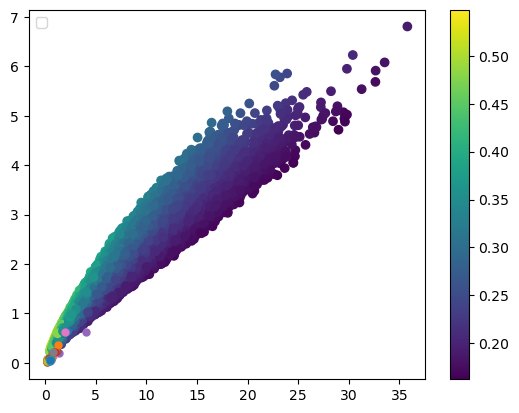

In [138]:
plt.scatter(
    portafolios["vol"],
    portafolios["media"],
    c=portafolios["rs"]
)
for i in range(len(summary)):
    if summary.iloc[i]["vol"] <= 5:
        plt.plot(
            summary.iloc[i]["vol"],
            summary.iloc[i]["media"],
            'o', ms=5
        )
plt.colorbar()
plt.legend()

In [139]:
# Portafolio EMV
emv = portafolios.iloc[portafolios["rs"].idxmax()]
emv

w        [0.005, 0.0626, 0.0091, 0.0053, 0.0253, 0.03, ...
media                                             0.344186
vol                                               0.610779
rs                                                0.548102
Name: 73806, dtype: object

In [140]:
# Portafolio mínima varianza
minvar = portafolios.iloc[portafolios["vol"].idxmin()]
minvar

w        [0.0349, 0.1109, 0.0107, 0.0119, 0.0334, 0.000...
media                                             0.241409
vol                                               0.477063
rs                                                0.486293
Name: 88067, dtype: object

In [141]:
sp = np.linspace(0, 10)
rs_emv = (emv["media"] - rf) / emv["vol"]
lac = pd.DataFrame({
    "vol": sp,
    "media": rs_emv * sp + rf
})

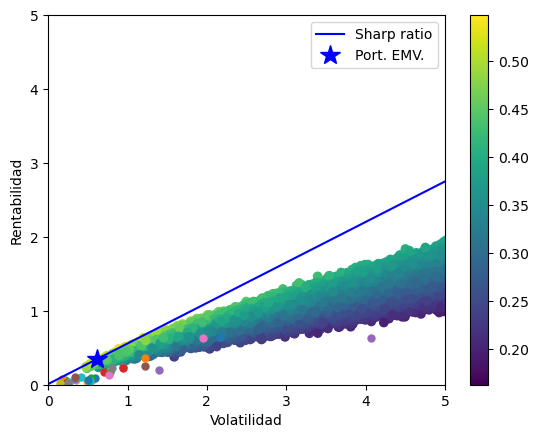

In [142]:
# Gráfica
plt.scatter(
    portafolios["vol"],
    portafolios["media"],
    c=portafolios["rs"]
)
for i in range(len(summary)):
     if summary.iloc[i]["vol"] <= 5:
         plt.plot(
            summary.iloc[i]["vol"],
            summary.iloc[i]["media"],
            'o', ms=5
        )
plt.plot(lac["vol"], lac["media"], 'b', label="Sharp ratio")
plt.plot(emv["vol"], emv["media"], "*b", ms=15, label="Port. EMV.")
# plt.plot(minvar["vol"], minvar["media"], "*b", ms=15, label="Port. Min. Var.")
plt.ylim([0, 5])
plt.xlim([0, 5])
plt.xlabel("Volatilidad")
plt.ylabel("Rentabilidad")
plt.colorbar()
plt.legend()

In [143]:
emv

w        [0.005, 0.0626, 0.0091, 0.0053, 0.0253, 0.03, ...
media                                             0.344186
vol                                               0.610779
rs                                                0.548102
Name: 73806, dtype: object

In [149]:
pd.DataFrame({"SKU": summary.reset_index()["SKU"],"investment_percentage": emv["w"],"month":"7"}).sort_values(by="investment_percentage", ascending=False).to_csv("ponderaciones_incluye_mes_7.csv")